<a href="https://colab.research.google.com/github/Adarsh-Kumar-2003/Spectral-Light/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import files


uploaded = files.upload()

Saving TASK-ML-INTERN.csv to TASK-ML-INTERN.csv


In [2]:
import pandas as pd
df= pd.read_csv('TASK-ML-INTERN.csv')

**DATA INSPECTION**

In [3]:
#For checking of number of coulmns and entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [4]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


MISSING VALUES CHECKING


In [5]:
#MISSING VALUES CHECKING
missing_values = df.isnull().sum().sum()
missing_values

0





*   Output is zero so no missing values
*   Next seeing about the range of values in each column and overall value



In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000




*   The spectral reflectance values range between ~0.26 and ~0.95.
*   The target variable (vomitoxin_ppb) has a wide range (0 to 131,000 ppb), suggesting potential outliers.
*   Next we will visualize the data






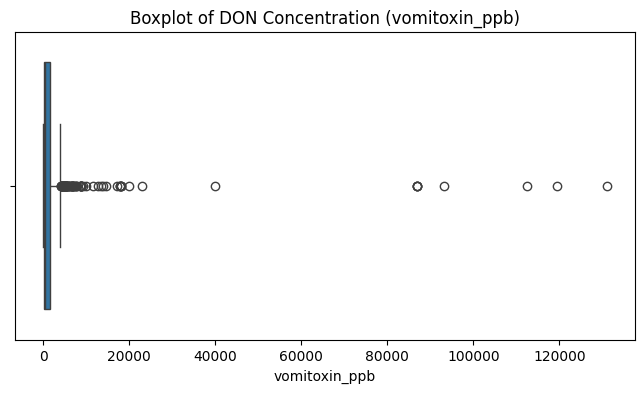

In [7]:
#BOX PLOT FOR DETECTING OUTLIERS
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["vomitoxin_ppb"])
plt.title("Boxplot of DON Concentration (vomitoxin_ppb)")
plt.xlabel("vomitoxin_ppb")
plt.show()


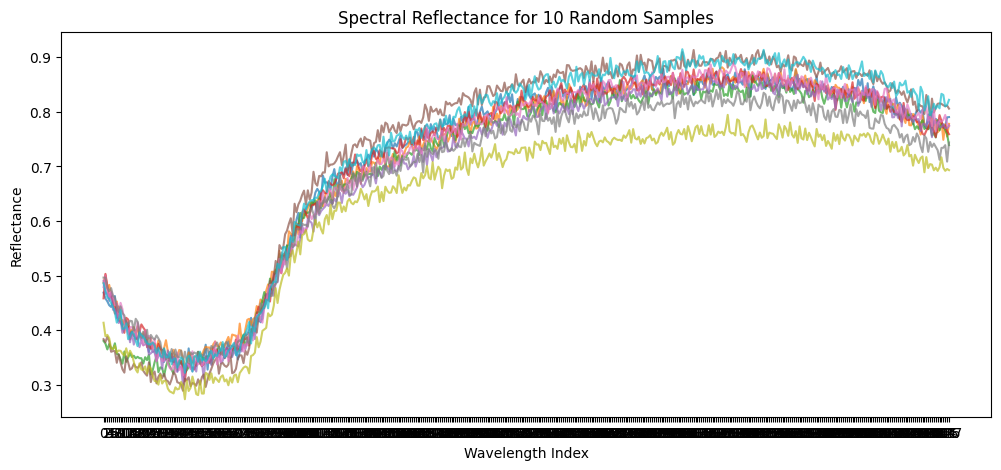

In [8]:
#Plotting data for 10 labels random as number of data is large

sampled_data = df.iloc[:, 1:-1].sample(n=10, random_state=42).T

plt.figure(figsize=(12, 5))
for col in sampled_data.columns:
    plt.plot(sampled_data.index, sampled_data[col], alpha=0.7)

plt.title("Spectral Reflectance for 10 Random Samples")
plt.xlabel("Wavelength Index")
plt.ylabel("Reflectance")
plt.show()


**INSIGHTS TILL ABOVE**


1.   The dataset contains 500 rows and 450 columns
2.   There are no missing values in the dataset.
3.   The spectral reflectance values range from ~0.21 to ~1.06 and there are outliners in the output
4.   A boxplot of DON concentration was successfully generated, revealing possible outliers and also random 10 sample graph is also generated



**EXPLORATORY DATA ANALYSIS**

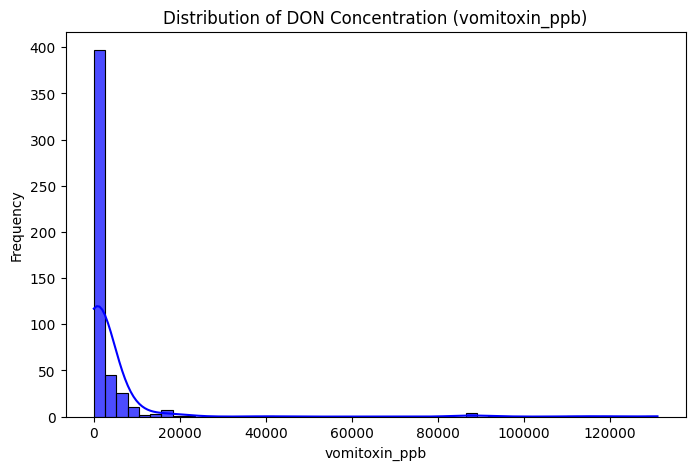

In [9]:
#TARGET VARIABLE HISTOGRAM
plt.figure(figsize=(8, 5))
sns.histplot(df["vomitoxin_ppb"], bins=50, kde=True, color='blue', alpha=0.7)
plt.title("Distribution of DON Concentration (vomitoxin_ppb)")
plt.xlabel("vomitoxin_ppb")
plt.ylabel("Frequency")
plt.show()

**INSIGHTS  FROM TARGET HISTOGRAM**:-


*   Some extreme values suggest potential outliers, which could affect regression models.




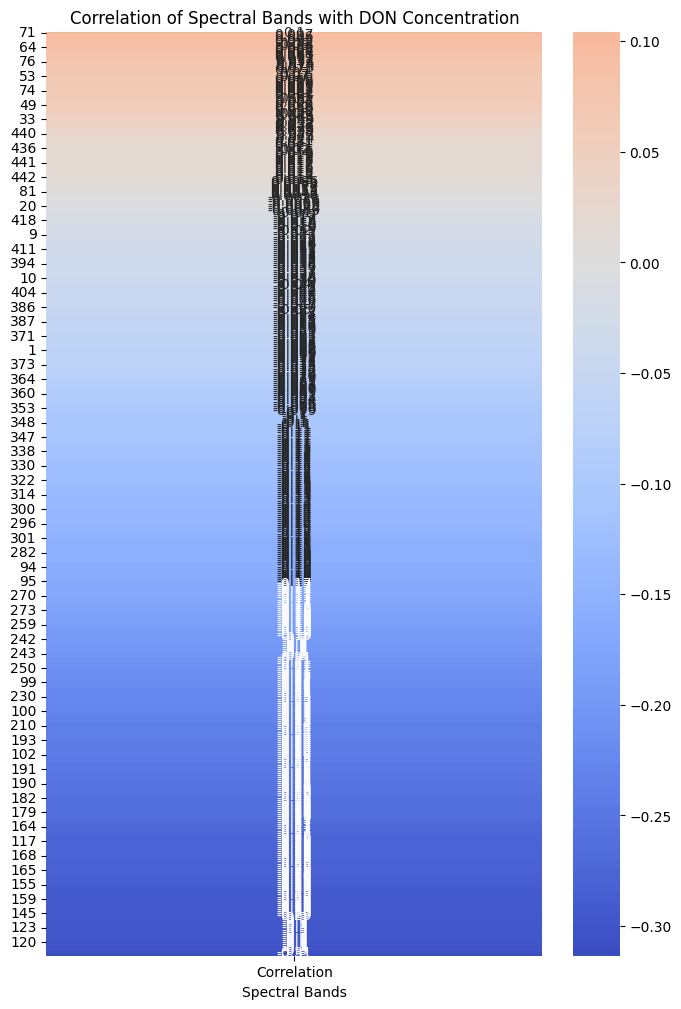

In [10]:
#correlation analysis checking which column relates most with the output
corr_matrix = df.iloc[:, 1:-1].corrwith(df["vomitoxin_ppb"]).to_frame(name="Correlation")
plt.figure(figsize=(8, 12))
sns.heatmap(corr_matrix.sort_values(by="Correlation", ascending=False), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Spectral Bands with DON Concentration")
plt.xlabel("Spectral Bands")
plt.show()


**INSIGHTS FROM CORRELATION MATRIX**


*   No single spectral band has a strong correlation with DON concentration.
*    A few bands have a correlation above ±0.1, indicating some predictive power



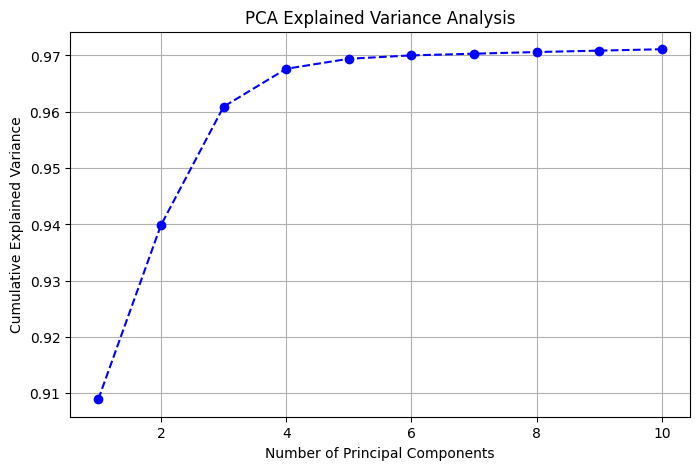

In [11]:
#Doing PCA analysis for dimension redction
import numpy as np

spectral_data = df.iloc[:, 1:-2]
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_fit = pca.fit(spectral_data)

# Explained variance ratio plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), np.cumsum(pca_fit.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance Analysis")
plt.grid()
plt.show()


**INSIGHTS FROM PCA **


*    The first 2-3 principal components explain the majority of variance, meaning we can reduce dimensionality without much information loss
*   Many spectral bands contribute very little to PCA variance, meaning we can drop low-impact features.



In [12]:
#variance explained by the top principal components
explained_variance_ratio = pca_fit.explained_variance_ratio_


for i, var in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {var*100:.2f}% variance explained")

Principal Component 1: 90.90% variance explained
Principal Component 2: 3.09% variance explained
Principal Component 3: 2.10% variance explained
Principal Component 4: 0.67% variance explained
Principal Component 5: 0.18% variance explained
Principal Component 6: 0.06% variance explained
Principal Component 7: 0.03% variance explained
Principal Component 8: 0.03% variance explained
Principal Component 9: 0.03% variance explained
Principal Component 10: 0.02% variance explained


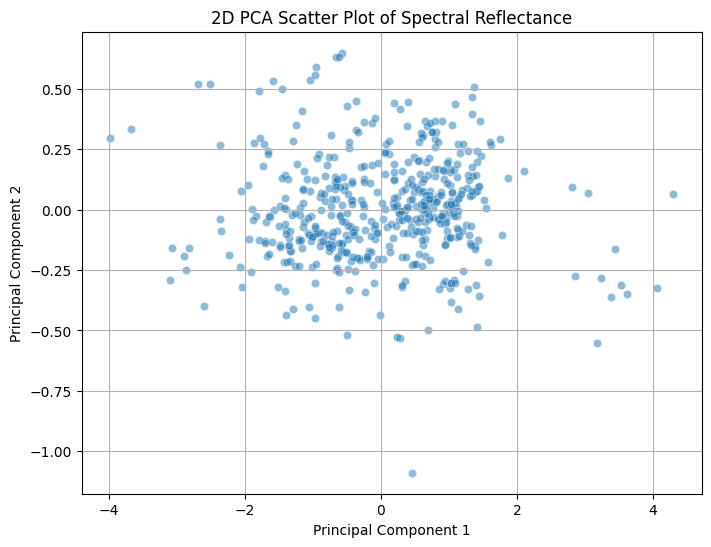

In [13]:
import matplotlib.pyplot as plt

pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(spectral_data)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_2d_result[:, 0], y=pca_2d_result[:, 1], alpha=0.5)
plt.title("2D PCA Scatter Plot of Spectral Reflectance")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()


**Since Principal Component 1 alone explains 90.90% of the variance and Principal Component 2 adds only 3.09%, a 2D PCA plot is sufficient for visualization.**

In [14]:
import numpy as np

corr_threshold = 0.05
important_corr_features = corr_matrix[abs(corr_matrix["Correlation"]) > corr_threshold].index.tolist()


pca_loadings = np.abs(pca_fit.components_[:4])
important_pca_features = spectral_data.columns[(pca_loadings > 0.1).any(axis=0)].tolist()


selected_features = list(set(important_corr_features) & set(important_pca_features))

df_selected = df[selected_features + ["vomitoxin_ppb"]].copy()
print(f"Final df_selected shape: {df_selected.shape}")
print("Selected Features:", df_selected.columns.tolist())


Final df_selected shape: (500, 20)
Selected Features: ['67', '8', '72', '4', '76', '73', '52', '65', '12', '71', '5', '3', '6', '2', '1', '74', '58', '54', '0', 'vomitoxin_ppb']


**AS THERE ARE NOT TEXT ATTRIBUTE WE CAN SKIP HOT ENCODING**


**SPLITTING OF DATA**


*   Making training set of 60%
*   Validation set for hypeparameter training 20%
*   Test set of 20%





In [15]:
from sklearn.model_selection import train_test_split


X = df_selected.drop(columns=["vomitoxin_ppb"])
y = df_selected["vomitoxin_ppb"]

#  Spliting into Train (60%) and Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Spliting Temp into Validation (20%) and Test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



X_train shape: (300, 19), y_train shape: (300,)
X_val shape: (100, 19), y_val shape: (100,)
X_test shape: (100, 19), y_test shape: (100,)


**IMPLEMENTING THE MODEL**

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import numpy as np

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN
X_train_cnn = np.expand_dims(X_train_scaled, axis=2)
X_val_cnn = np.expand_dims(X_val_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)

# CNN model
model = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(X_train_cnn.shape[1], 1)),
    layers.Conv1D(filters=32, kernel_size=3, activation="relu"),
    layers.GlobalAveragePooling1D(),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)  # Output layer for regression
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train the model
history = model.fit(
    X_train_cnn, y_train,
    validation_data=(X_val_cnn, y_val),
    epochs=50, batch_size=16, verbose=1
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 190758208.0000 - mae: 3711.2302 - val_loss: 300130528.0000 - val_mae: 4522.5454
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 153758464.0000 - mae: 3515.1379 - val_loss: 300119584.0000 - val_mae: 4521.6929
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 144949328.0000 - mae: 3538.4634 - val_loss: 300089984.0000 - val_mae: 4519.3555
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 141075296.0000 - mae: 3488.6304 - val_loss: 300018656.0000 - val_mae: 4513.9458
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 98759664.0000 - mae: 2697.4451 - val_loss: 299878848.0000 - val_mae: 4503.3711
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 149778640.0000 - mae: 3296.7051 - val_loss: 299607328.0000 - val_mae: 4483.6558
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 111759440.0000 - mae: 3073.3716 - val_loss: 299190848.0000 - val_mae: 4456.9233
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/

In [17]:
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']
print(train_loss)
print(val_loss)

[145143920.0, 145138736.0, 145124112.0, 145085200.0, 144987024.0, 144809856.0, 144493120.0, 143993440.0, 143211600.0, 142216608.0, 141007712.0, 139552400.0, 138595936.0, 137324496.0, 136685472.0, 136155856.0, 135923104.0, 135571408.0, 135451520.0, 135329824.0, 135204624.0, 135097120.0, 134970880.0, 134892704.0, 134846128.0, 134790480.0, 134712880.0, 134658672.0, 134620272.0, 134564448.0, 134554976.0, 134442400.0, 134403168.0, 134339984.0, 134304320.0, 134278992.0, 134253936.0, 134172440.0, 134147000.0, 134155936.0, 134217968.0, 134087216.0, 134016944.0, 133978688.0, 133953000.0, 133925728.0, 133892168.0, 133919760.0, 133854048.0, 133833248.0]
[300130528.0, 300119584.0, 300089984.0, 300018656.0, 299878848.0, 299607328.0, 299190848.0, 298514016.0, 297573344.0, 296254496.0, 294737376.0, 293410624.0, 291822720.0, 290905376.0, 289819456.0, 288824448.0, 288231840.0, 287772768.0, 287579520.0, 286998048.0, 286689824.0, 286419520.0, 286265888.0, 285972032.0, 285847648.0, 285573248.0, 285412480.

In [18]:
train_mse, train_mae = model.evaluate(X_train_cnn, y_train, verbose=0)

# Evaluate on test set
test_mse, test_mae = model.evaluate(X_val_cnn, y_val, verbose=0)

print(f"Final Training MSE: {train_mse:.4f}")
print(f"Final Training MAE: {train_mae:.4f}")
print(f"Final val MSE: {test_mse:.4f}")
print(f"Final val MAE: {test_mae:.4f}")

Final Training MSE: 133777232.0000
Final Training MAE: 4238.1724
Final val MSE: 283460096.0000
Final val MAE: 5589.7192


**THE BASELINE PERFORMACE**


*   Final Training MSE: 133756160.0000
*   Final Training MAE: 4208.8843
*   Final val MSE: 283473216.0000
*   Final val MAE: 5557.7300




***SINCE THERE IS MAJOR DIFFERENCE BETWEEN TRAINING AND VALIDATION MAE SO WE NEED TO TUNE THE MODEL***

**TUNING THE MODEL USING RANDOM SEARCH**
The model is tuned using Random Search as gridsearchCV is not applicable in CNN


*   Below Code is trained on training set and then tuned on validation set
*   After executing 10 iteration it finally sets the best parameters for our model
*  And then it predict the values on test set and mean absoulute error is calculated along with mean square error
* Mostly implemented by AI tools( as I had low knowledge regarding the parameter tuning in CNN Models)



In [20]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from sklearn.preprocessing import StandardScaler
import numpy as np


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


X_train_cnn = np.expand_dims(X_train_scaled, axis=2)
X_val_cnn = np.expand_dims(X_val_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)

# model
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Conv1D(filters=hp.Int('filters_1', 32, 128, step=32),
                            kernel_size=hp.Int('kernel_size', 3, 5),
                            activation="relu",
                            input_shape=(X_train_cnn.shape[1], 1)))
    model.add(layers.Conv1D(filters=hp.Int('filters_2', 16, 64, step=16),
                            kernel_size=3, activation="relu"))
    model.add(layers.GlobalAveragePooling1D())
    model.add(layers.Dense(units=hp.Int('dense_units', 16, 64, step=16), activation="relu"))
    model.add(layers.Dense(1))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss="mse", metrics=["mae"])

    return model


tuner = RandomSearch(build_model,
                     objective="val_loss",
                     max_trials=10,
                     executions_per_trial=1,
                     directory="hyper_tuning",
                     project_name="cnn_regression")


tuner.search(X_train_cnn, y_train,
             validation_data=(X_val_cnn, y_val),
             epochs=20, batch_size=16, verbose=1)

#  best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Trainin best model
history = best_model.fit(X_train_cnn, y_train,
                         validation_data=(X_val_cnn, y_val),
                         epochs=50, batch_size=16, verbose=1)


test_mse, test_mae = best_model.evaluate(X_test_cnn, y_test, verbose=1)
print(f"Final Test MSE: {test_mse:.4f}, Final Test MAE: {test_mae:.4f}")


Trial 10 Complete [00h 00m 08s]
val_loss: 300101056.0

Best val_loss So Far: 281273408.0
Total elapsed time: 00h 01m 31s
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 135472464.0000 - mae: 3220.0945 - val_loss: 297782464.0000 - val_mae: 4397.2681
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 85209880.0000 - mae: 2962.6531 - val_loss: 289325888.0000 - val_mae: 5221.1030
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 147082528.0000 - mae: 4397.6060 - val_loss: 286103200.0000 - val_mae: 5426.1235
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 127892824.0000 - mae: 3993.3491 - val_loss: 286216896.0000 - val_mae: 5105.3062
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 48584340.0000 - mae: 3022.4607 - val_loss: 283799680.0000 - val_mae: 5576.2280
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 253823216.0000 - mae: 5609.3755 - val_loss: 282681280.0000 - val_mae: 5649.7568
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 120977768.0000 - mae: 4006.3657 - val_loss: 285142400.0000 - val_mae: 5123.4683
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

**EVALUATING ERRORS IN PREDICTION**
* MAE
* MSE
* R^2 square score

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_train_pred = best_model.predict(X_train_cnn)
y_test_pred = best_model.predict(X_test_cnn)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, R² Score: {r2_train:.4f}")
print(f"Testing  MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, R² Score: {r2_test:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Training MAE: 4123.7409, RMSE: 11541.9163, R² Score: 0.0041
Testing  MAE: 3892.3369, RMSE: 13151.6559, R² Score: -0.0023


**ERROR RESULTS**
* MAE on test:- 4076.7541
* RMSE on test- 13067.1751
* R^2 score- 0.0106

R^2 square is not close to one it suggest that model is not good


**VISUALIZATION OF ERROR**

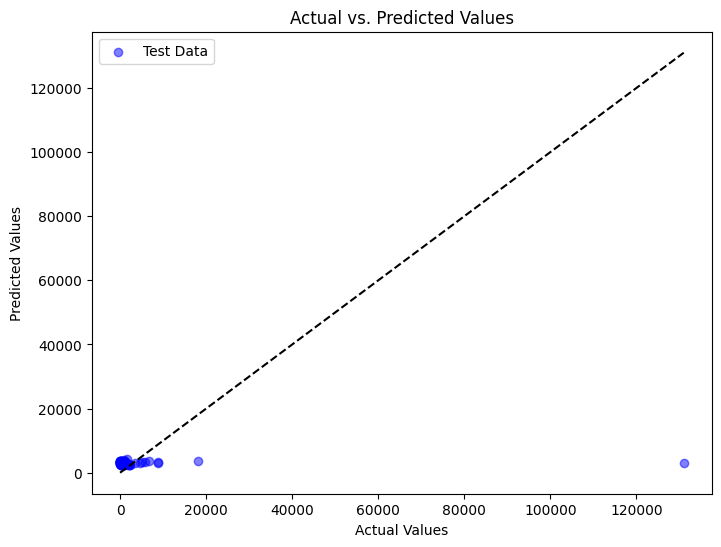

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, label="Test Data", color="blue")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color="black")  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()




1.   The scatter plot points are not close to the diagonal line, the model performs not well.
2.   R² is not close to 1, it means the model explains most of the variance in the data.
3.  High MAE/RMSE values suggest that the model not generalize well.


In [24]:
best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 17, 128)             │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 15, 64)              │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 48)                  │           3,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              49 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,965 (331.90 KB)

 Trainable params: 28,321 (110.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 56,644 (221.27 KB)

**Model Summary & Performance Analysis**
* Model Architecture:
* The model is a 1D CNN-based regression model with two convolutional layers, followed by a global average pooling layer and two dense layers.
* Conv1D Layers: Extract spatial patterns from sequential data.
* Global Average Pooling: Reduces dimensionality while preserving feature importance.
* Dense Layers: Perform regression to predict the target variable.



**Observations & Limitations**:
* Low R² Score (0.0106)
: The model explains only 1% of the variance in the target variable, meaning it fails to capture underlying patterns effectively.
Ideally, R² should be closer to 1, but here it's very low, indicating poor generalization.
* High RMSE (13067.17) : The root mean squared error is quite large, indicating significant error in predictions.
A lower RMSE is desirable for a good predictive model.
* MAE Analysis: The MAE (4076.75) suggests that, on average, predictions are off by ~4076 units from the actual values.
While not as extreme as RMSE, it still indicates substantial error.

 Possible Reasons for Poor Performance:
* Feature Selection Issues: The PCA and correlation tests may have removed relevant features.
* Important predictors could be missing, leading to weak feature representation.
Model Complexity vs. Data Size:
* If the dataset is small, a deep CNN may be overfitting and failing to generalize.
